In [7]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

from shephard import interfaces, apis
from sparrow import Protein

In [2]:
names = ['UP000000589_10090.fasta', 'UP000001940_6239.fasta',  'UP000005640_9606.fasta', 'UP000000803_7227.fasta', 'UP000002311_559292.fasta', 'UP000006548_3702.fasta', 'UP000001805_367110.fasta']
taxon2name = {}
taxon2name[10090]   = 'mouse'
taxon2name[3702]    = 'cress'
taxon2name[559292]  = 'yeast'
taxon2name[6239]    = 'nematode'
taxon2name[7227]    = 'fly'
taxon2name[9606]    = 'human'
taxon2name[367110]  = 'neurospora'

proteomes = {}

In [4]:
for n in names:
    species = taxon2name[int(n.split('_')[1].split('.')[0])]

    proteomes[species] = apis.uniprot.uniprot_fasta_to_proteome(f"data/{n}", invalid_sequence_action='convert')
    interfaces.si_domains.add_domains_from_file(proteomes[species], f"data/shprd_domains_idrs_{n}.tsv")
                                      

In [45]:
length_cutoff = 60
n='human'
all_frags = {}
all_frags[n] = []
for p in proteomes[n]:
    for d in p.domains:
        if len(d) > length_cutoff:
            for i in range(0, 1+(len(d)-length_cutoff)):
                window = d.sequence[i:i+length_cutoff]
                all_frags[n].append(Protein(window).hydrophobicity)
                
    

In [69]:
data = all_frags['human']
binsize=0.05
bins = np.arange(0,9+binsize, binsize)

meta NOT subset; don't know how to subset; dropped


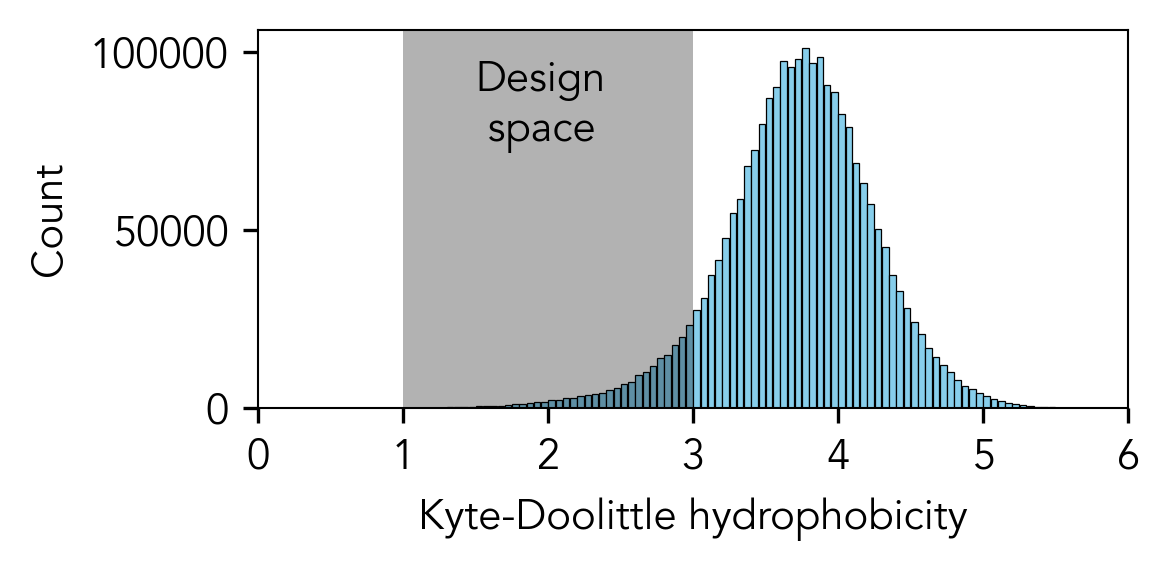

In [89]:
# Compute the histogram
hist, bins = np.histogram(data, bins=bins)

# Width of each bin
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2    

figure(num=None, figsize=(4, 2), dpi=150, facecolor='w', edgecolor='k')
plt.bar(center, hist, align='center', width=width, color='skyblue', edgecolor='black', lw=-.3)
ax = plt.gca()
ax.axvspan(1,3, linewidth=0, alpha=0.3, color='k')
plt.xlabel('Kyte-Doolittle hydrophobicity')
plt.ylabel('Count')
plt.xlim([0,6])
plt.text(1.5,75000, 'Design\n space', color='k') 
plt.tight_layout()
plt.savefig('figs/hydrophobicity_vs_design_space.pdf')